In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression

In [34]:
df =pd.read_csv("https://raw.githubusercontent.com/tirodkarp/AI_Impact_on_Jobs_2030/refs/heads/main/AI_Impact_on_Jobs_2030.csv")
df.head(100)

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,HR Specialist,75500,28,Bachelor's,0.42,0.70,0.64,Medium,0.17,0.96,0.42,0.85,0.63,0.74,0.77,0.50,0.54,0.51
96,Truck Driver,95128,3,PhD,0.03,0.90,0.85,High,0.60,0.79,0.66,0.99,0.28,0.36,0.38,0.47,0.84,0.24
97,UX Researcher,49975,3,High School,0.91,0.68,0.40,Medium,0.97,0.18,0.85,0.49,0.25,0.87,0.45,0.51,0.36,0.59
98,Chef,75893,16,Master's,0.39,1.47,0.40,Medium,0.66,0.33,0.77,0.13,0.97,0.45,0.24,0.07,0.17,0.52


In [35]:
df.shape

(3000, 18)

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [37]:
df.isna().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

In [38]:
df.describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df.columns.tolist()

['Job_Title',
 'Average_Salary',
 'Years_Experience',
 'Education_Level',
 'AI_Exposure_Index',
 'Tech_Growth_Factor',
 'Automation_Probability_2030',
 'Risk_Category',
 'Skill_1',
 'Skill_2',
 'Skill_3',
 'Skill_4',
 'Skill_5',
 'Skill_6',
 'Skill_7',
 'Skill_8',
 'Skill_9',
 'Skill_10']

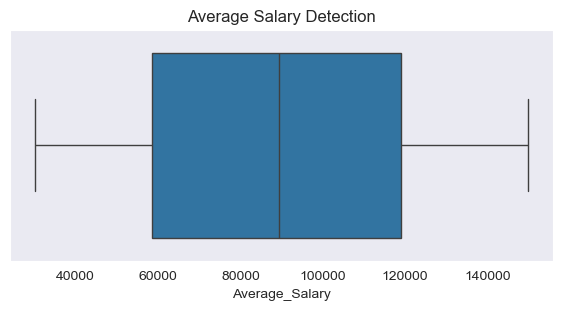

In [40]:
# boxplot ..  Visualization 
plt.figure(figsize=(7,3))
sns.boxplot(x=df["Average_Salary"])
plt.title("Average Salary Detection")
plt.show()

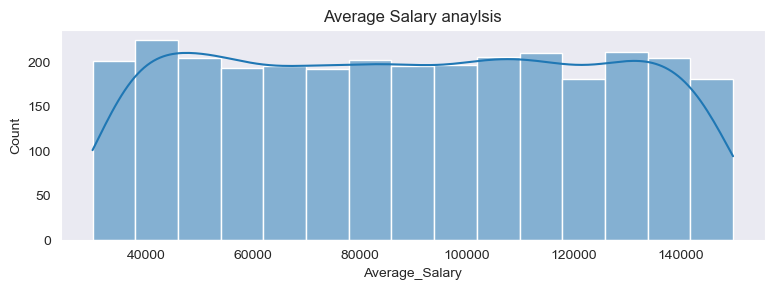

In [41]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.histplot(df["Average_Salary"], kde=True)
plt.title("Average Salary anaylsis")
plt.show()

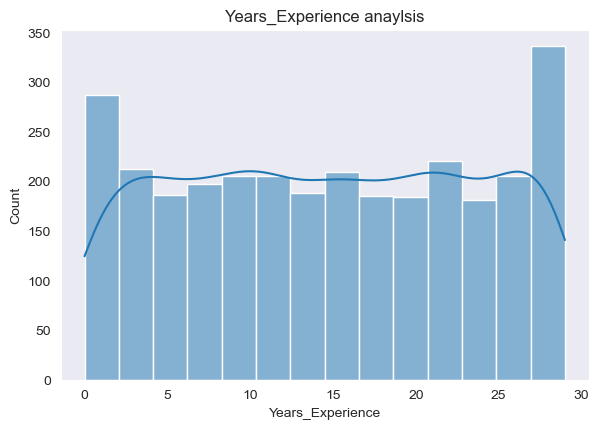

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.histplot(df["Years_Experience"], kde=True)
plt.title("Years_Experience anaylsis")
plt.show()

<h1>iqr</h1>
<h1>outilers</h1>

In [43]:
q1 = df['Average_Salary'].quantile(0.25)
q3 = df['Average_Salary'].quantile(0.75)
iqr = q3-q1

lower = q1 - 1.5*iqr
upper = q1 + 1.5*iqr

outliers = df[(df['Average_Salary'] < lower) | (df['Average_Salary'] > upper)]

print("IQR =",iqr)
print(outliers[['Job_Title','Average_Salary']].head())


IQR = 60446.5
              Job_Title  Average_Salary
150    Customer Support          149798
343   Financial Analyst          149391
879              Lawyer          149528
975    Graphic Designer          149487
1155     Data Scientist          149346


In [44]:
from scipy import stats


df['zscore'] = stats.zscore(df['Average_Salary'])
z_outliners = df[np.abs(df['zscore']) > 1]
print(z_outliners[['Job_Title','Average_Salary']].head())

             Job_Title  Average_Salary
0       Security Guard           45795
1   Research Scientist          133355
2  Construction Worker          146216
3    Software Engineer          136530
7              Teacher           53419


In [45]:
df_unique = ['Job_Title']
for col in df_unique:
    print(f'{col} : {df[col].unique()}')

Job_Title : ['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']


In [46]:
df_unique = ['Education_Level']
for col in df_unique:
    print(f'{col} : {df[col].unique()}')

Education_Level : ["Master's" 'PhD' 'High School' "Bachelor's"]


<h1># feature Enginering 
# create a new feature</h1>

In [47]:
df["salary_by_years_experience"] = df["Average_Salary"]/df["Years_Experience"]
df[['Job_Title',"salary_by_years_experience"]].head(100)

,Job_Title,salary_by_years_experience
0,Security Guard,1635.535714
1,Research Scientist,6667.750000
2,Construction Worker,73108.000000
3,Software Engineer,10502.307692
4,Financial Analyst,3199.863636
...,...,...
95,HR Specialist,2696.428571
96,Truck Driver,31709.333333
97,UX Researcher,16658.333333
98,Chef,4743.312500


In [48]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,zscore,salary_by_years_experience
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,-1.259374,1635.535714
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,1.271092,6667.750000
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,1.642772,73108.000000
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,1.362849,10502.307692
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,-0.548382,3199.863636


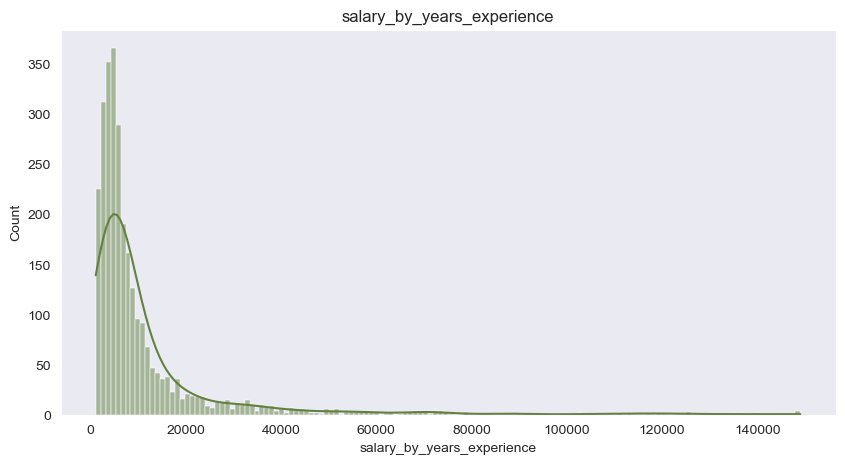

In [49]:
plt.figure(figsize=(10,5))

sns.histplot(df["salary_by_years_experience"], kde=True,color="#628141")
plt.title("salary_by_years_experience")
plt.show()

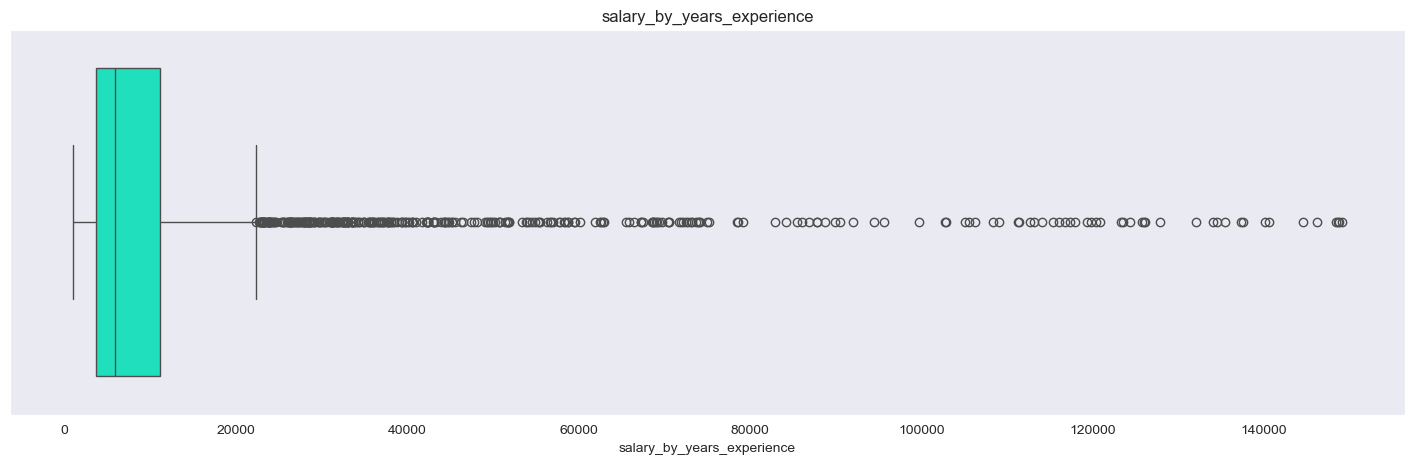

In [50]:
plt.figure(figsize=(18,5))
sns.boxplot(x=df["salary_by_years_experience"],color="#00ffd2")
plt.title("salary_by_years_experience")
plt.show()

<h1> Salary by Job Title</h1>

C:\Users\PRASAD\AppData\Local\Temp\ipykernel_13264\4200209986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Job_Title",y="Average_Salary",estimator="mean",palette="viridis")


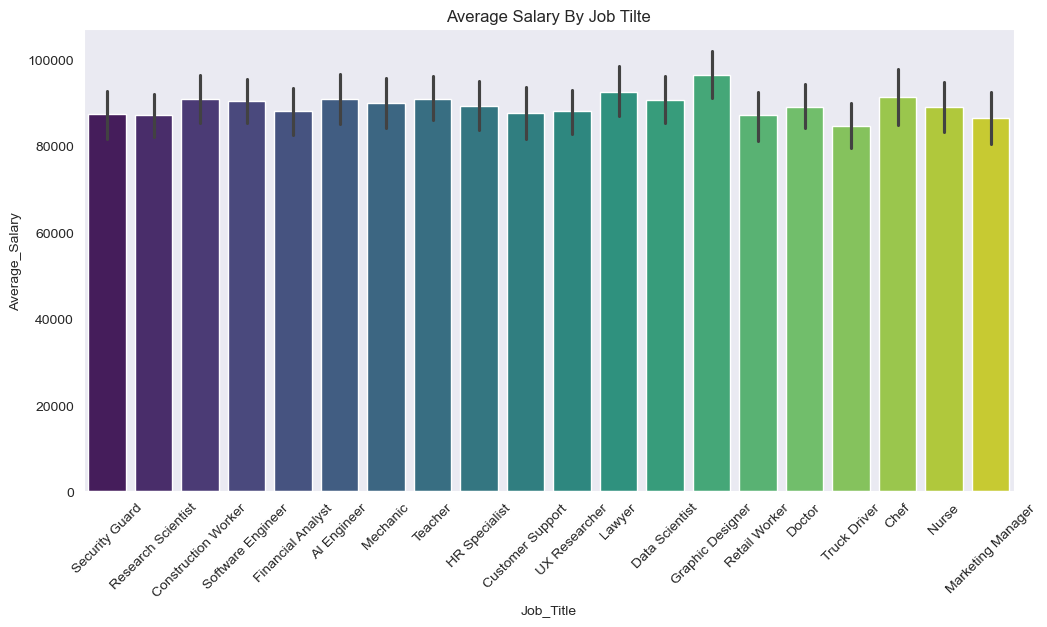

In [51]:

plt.figure(figsize=(12,6))
sns.barplot(data=df,x="Job_Title",y="Average_Salary",estimator="mean",palette="viridis")
plt.title("Average Salary By Job Tilte")
plt.xticks(rotation = 45)
plt.show()


<h1>  salary by eductaion level </h1>

In [52]:
df["Education_Level"].head()

0       Master's
1            PhD
2    High School
3            PhD
4    High School
Name: Education_Level, dtype: object

C:\Users\PRASAD\AppData\Local\Temp\ipykernel_13264\1651075434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Education_Level",y="Average_Salary",palette="coolwarm"


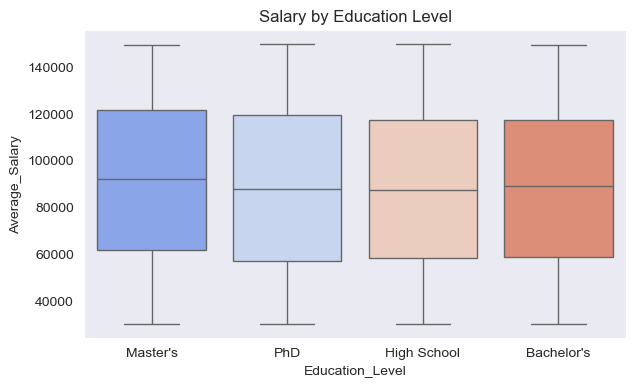

In [53]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df,x="Education_Level",y="Average_Salary",palette="coolwarm"
)
plt.title("Salary by Education Level")
plt.show()

In [54]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,zscore,salary_by_years_experience
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,-1.259374,1635.535714
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,1.271092,6667.750000
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,1.642772,73108.000000
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,1.362849,10502.307692
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,-0.548382,3199.863636


In [55]:
df[['Job_Title','Risk_Category']].head()

,Job_Title,Risk_Category
0,Security Guard,High
1,Research Scientist,Low
2,Construction Worker,High
3,Software Engineer,Medium
4,Financial Analyst,Medium


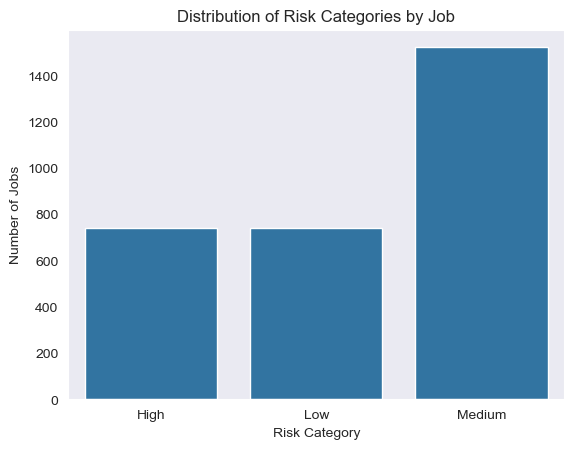

In [56]:
sns.countplot(df, x="Risk_Category")
plt.title("Distribution of Risk Categories by Job")
plt.xlabel("Risk Category")
plt.ylabel("Number of Jobs")
plt.show()

<h1>job title vs risk_category</h1>



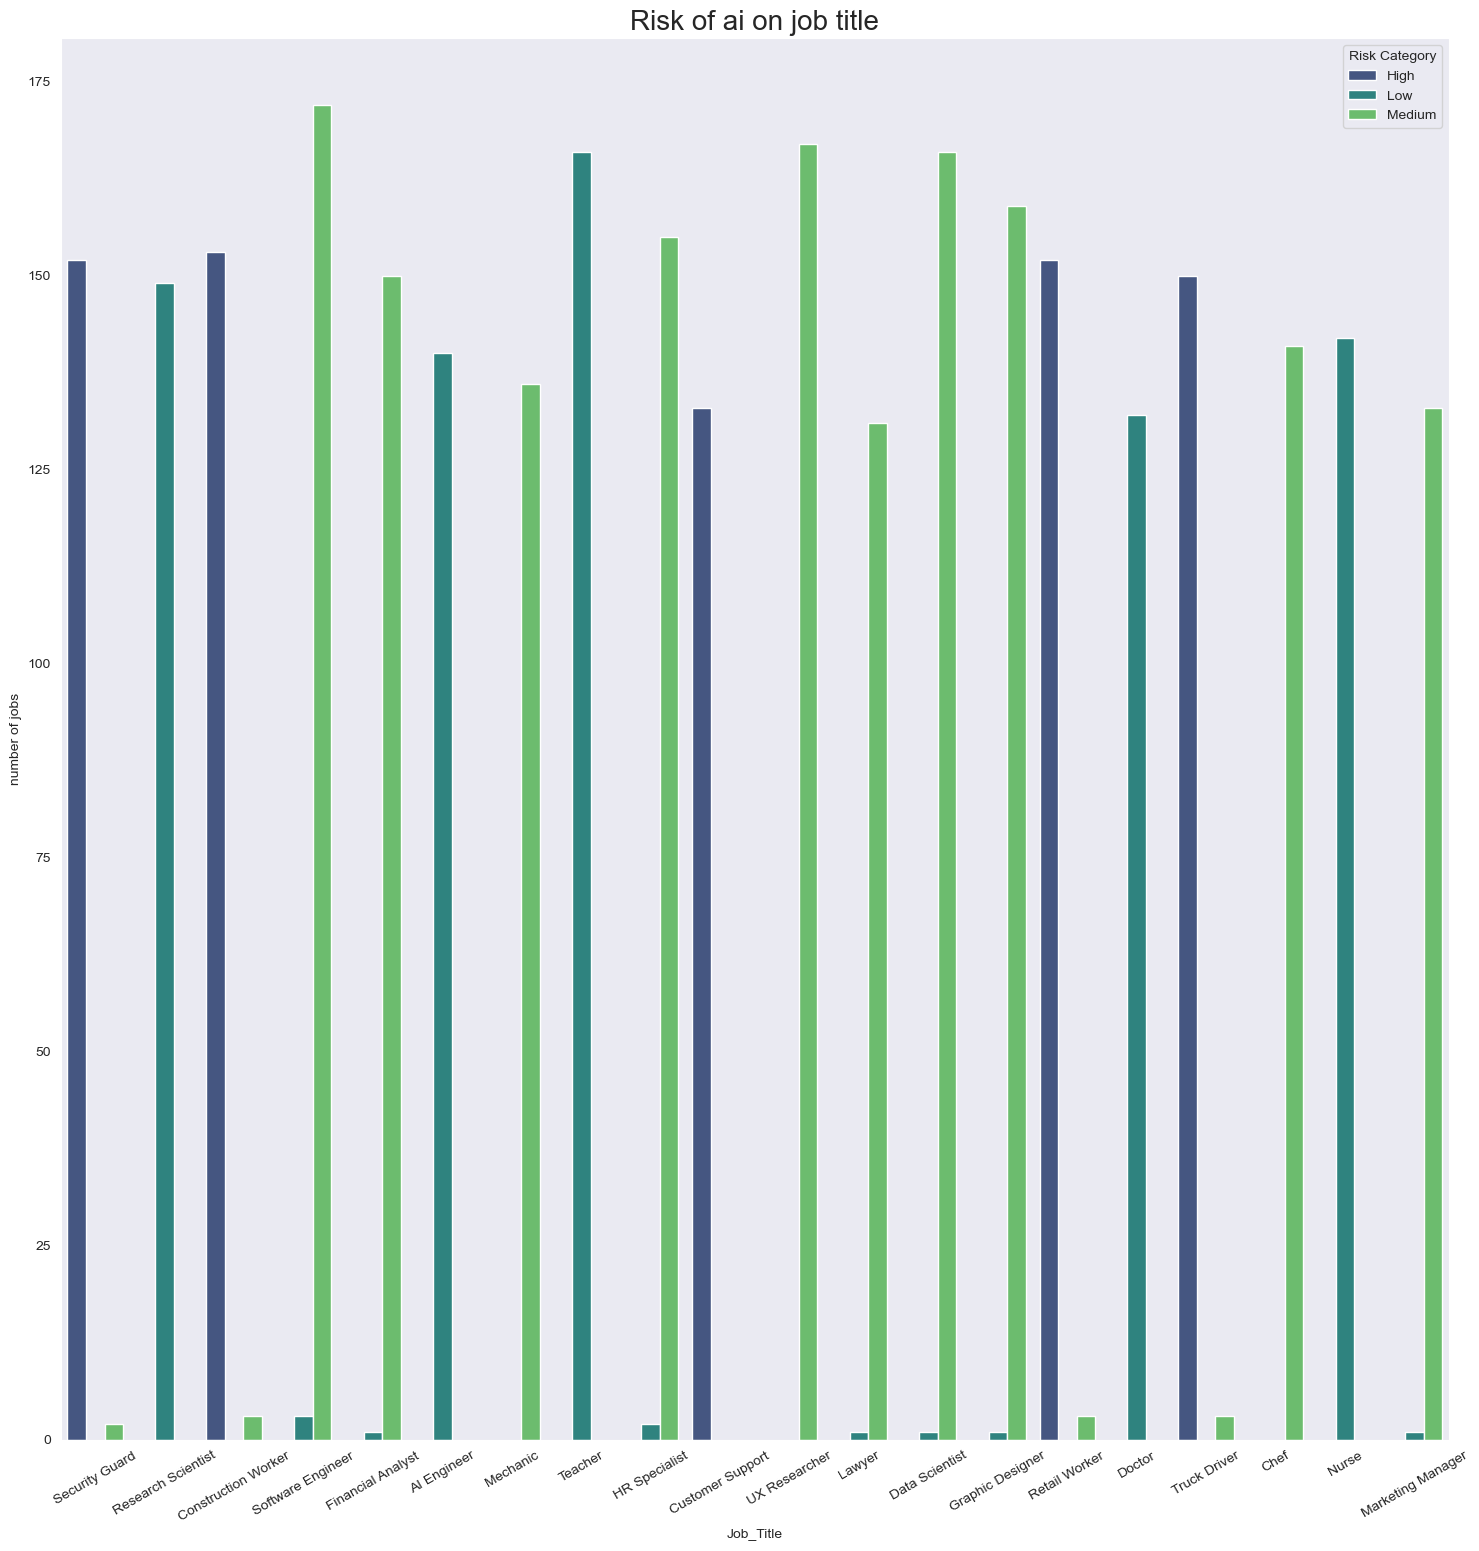

In [57]:
plt.figure(figsize =(15,15))
sns.countplot(df,x="Job_Title",hue="Risk_Category",palette="viridis")
plt.title("Risk of ai on job title",fontsize=20)
plt.xlabel("Job_Title")
plt.ylabel("number of jobs")
plt.legend(title="Risk Category")
sns.set_style("dark")
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

<h1>Automation Probability Distribution by job title</h1>

In [58]:
df["Automation_Probability_2030"].head()

0    0.85
1    0.05
2    0.81
3    0.60
4    0.64
Name: Automation_Probability_2030, dtype: float64

In [59]:
data_unique = ['Job_Title']
for col in data_unique:
    print(f'{col} : {df[col].unique()}')

Job_Title : ['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']


In [60]:
df_copy1 =df.copy()

In [61]:
le = LabelEncoder()#label enconding

df_copy1 ['Job_Title'] = le.fit_transform(df_copy1 ['Job_Title'])

In [62]:
data_unique = ['Job_Title']
for col in data_unique:
    print(f'{col} : {df_copy1 [col].unique()}')

Job_Title : [15 13  2 16  6  0 11 17  8  3 19  9  4  7 14  5 18  1 12 10]


C:\Users\PRASAD\AppData\Local\Temp\ipykernel_13264\2412179225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_copy1,x="Job_Title",y="Automation_Probability_2030",palette="viridis")


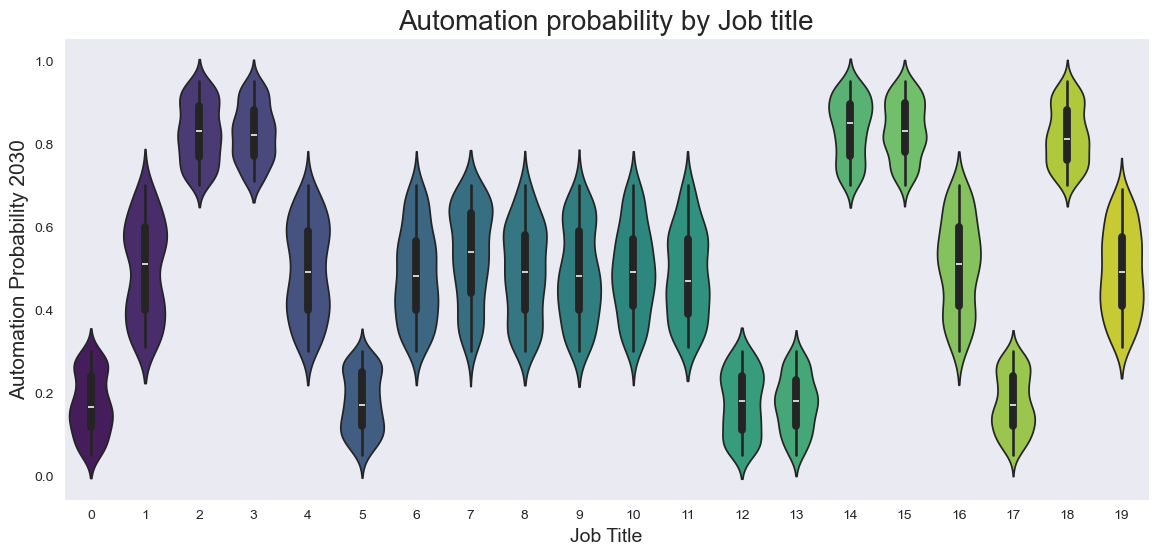

In [63]:
plt.figure(figsize= (14,6))
sns.violinplot(df_copy1,x="Job_Title",y="Automation_Probability_2030",palette="viridis")
plt.title("Automation probability by Job title",fontsize=20)
plt.xlabel("Job Title",fontsize= 14)
plt.ylabel("Automation Probability 2030",fontsize=15)
plt.show()

<h1>Correlation Heatmap of numeric features of automation</h1>

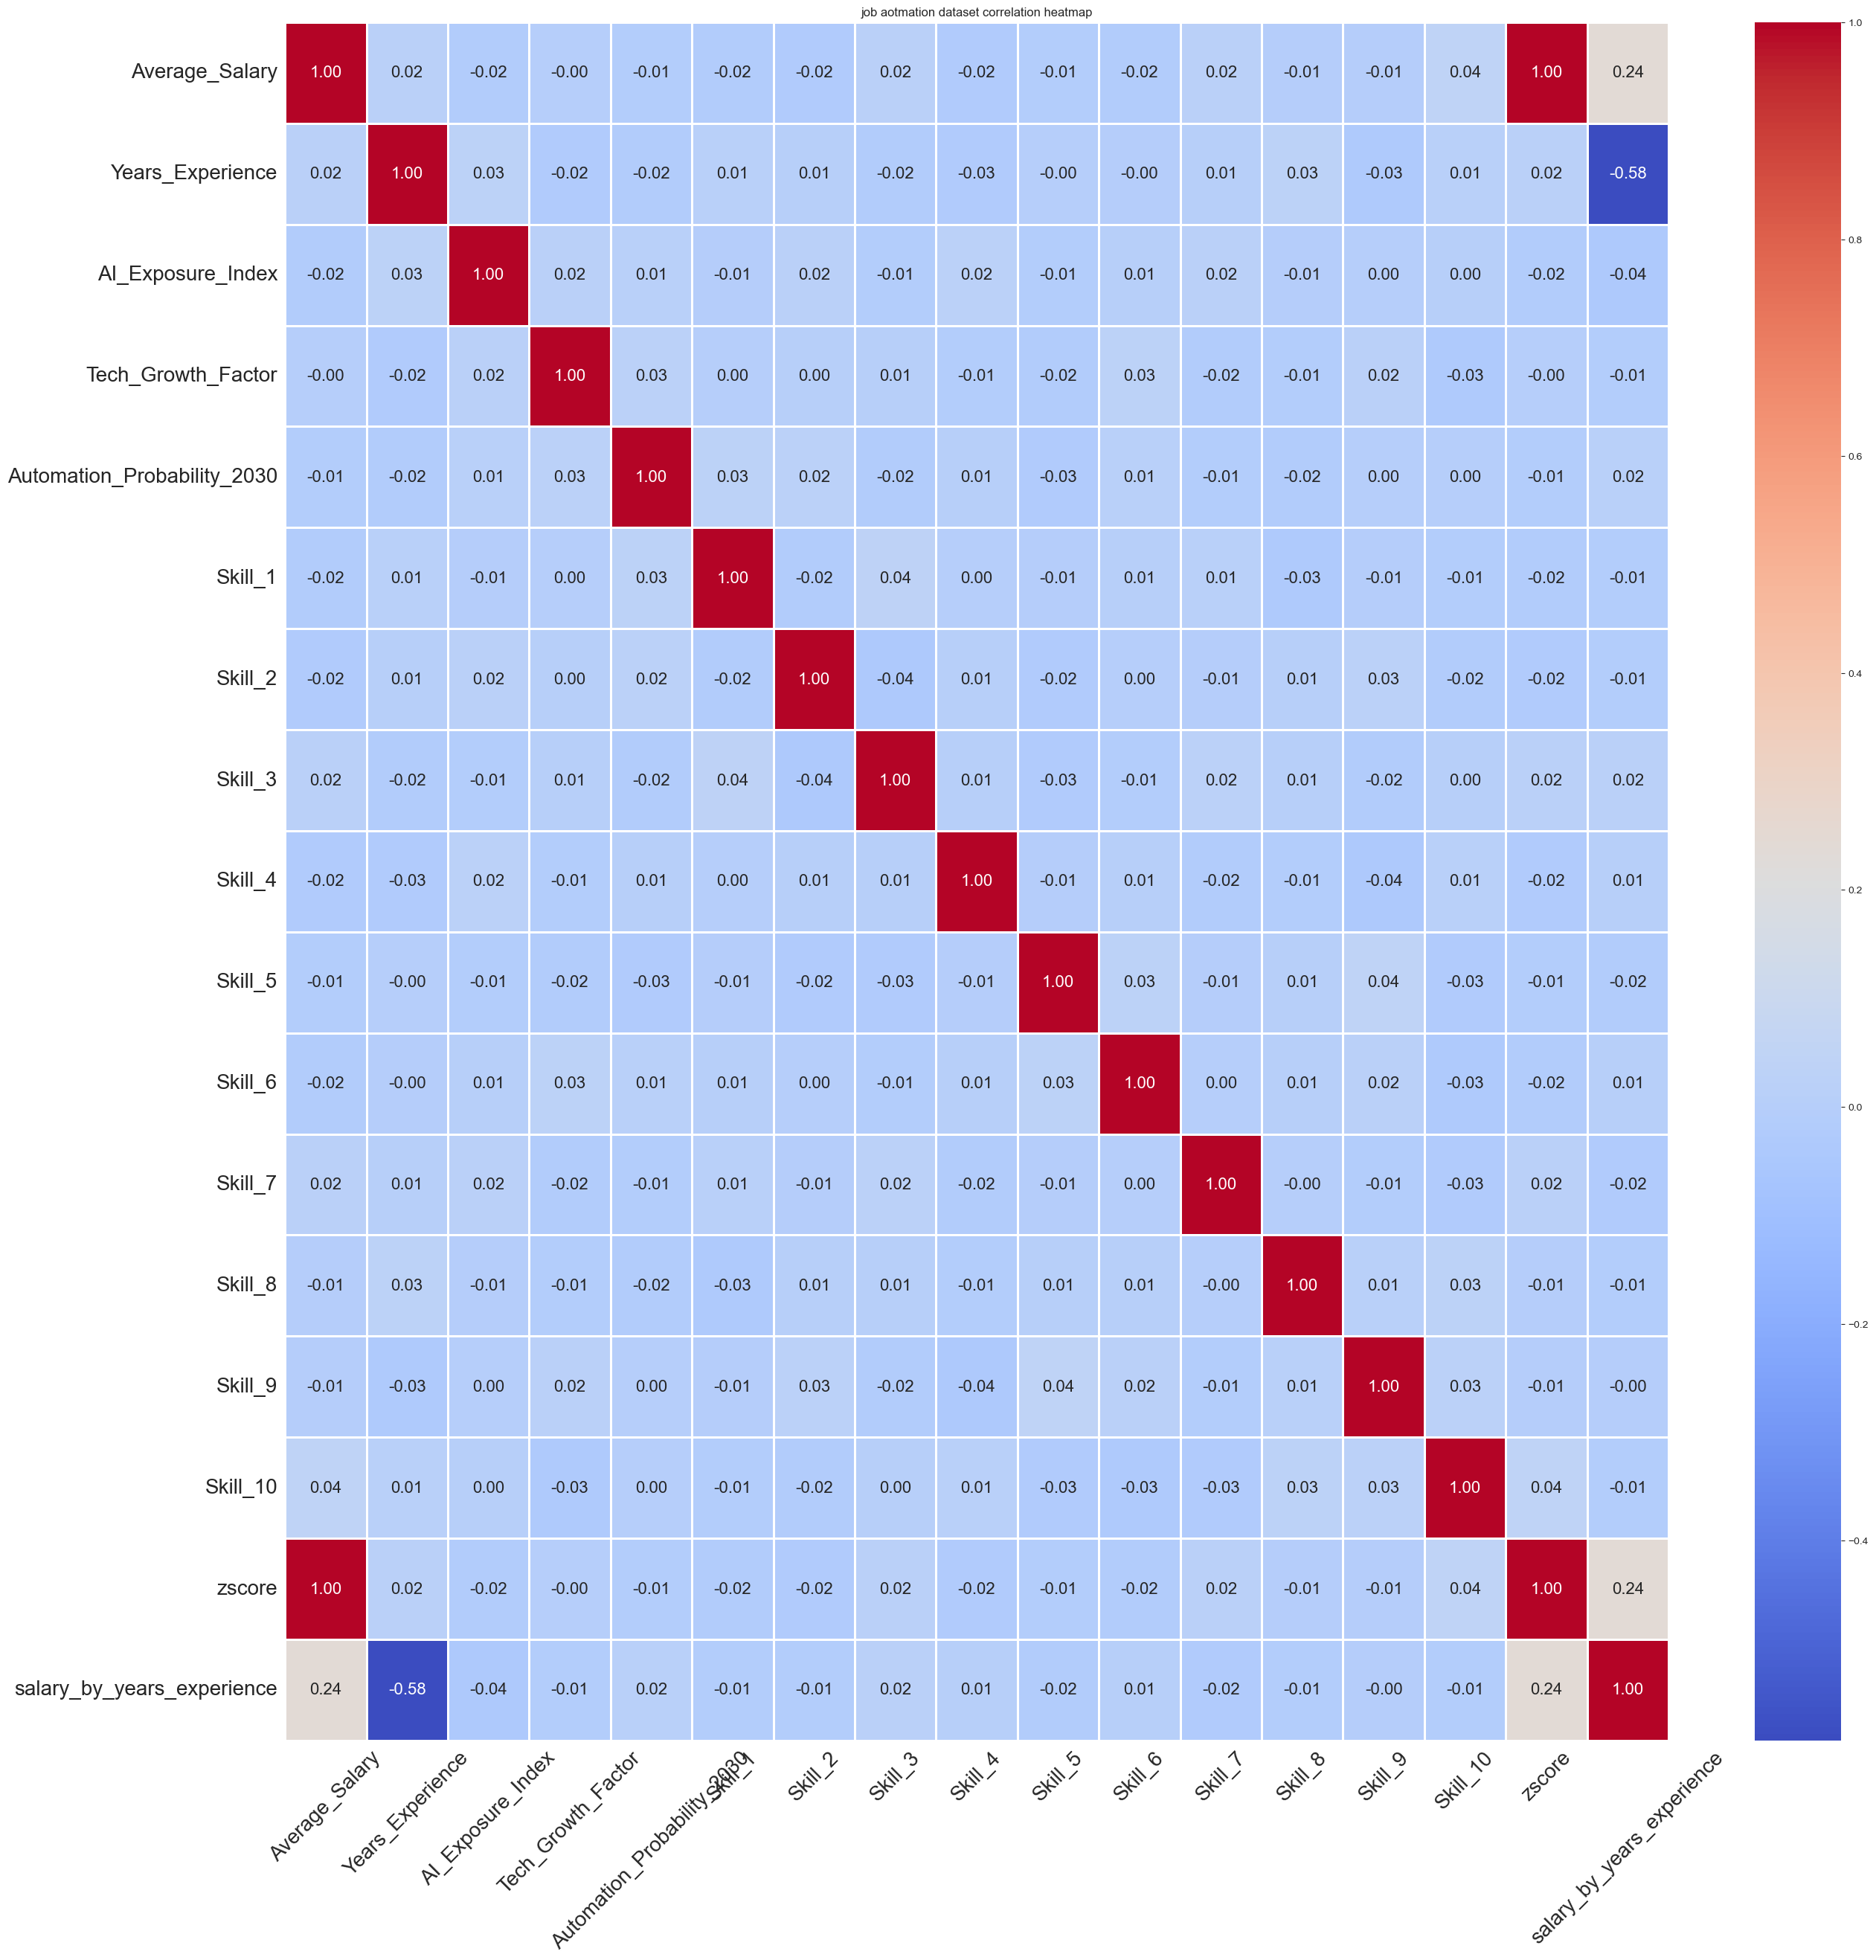

In [64]:


numeric_df =df.select_dtypes(include='number')#take only numberic values from dataset
plt.figure(figsize=(30,30))
#.corr() calculates pairwise correlations between all numeric columns.
sns.heatmap(numeric_df.corr(),annot=True,annot_kws={"size":16},fmt=".2f",cmap="coolwarm",linewidths=1.0)
plt.title("job aotmation dataset correlation heatmap")
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.show()